# Decision Trees to Predict ESP Failures

** Please Note: **

I had to first install GraphViz.
For Windows, I used the MSI version here. (http://www.graphviz.org/Download_windows.php)

Installed it (by double-clicking the xx.msi file).

Change the Environment variables:
(https://stackoverflow.com/a/20458620/918215)

Verify using $PATH
Then pydot, pydotplus etc worked.

In [1]:
#pip install pydot
#pip install pydotplus

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [14]:
esp3 = pd.read_csv("data/ESP Data/Wells_ESP3.csv")

In [15]:
esp3.head()

,Well,ESP_OD_Casing_inches,Motor_Oil_Temperature,Intake_Temperature_F,Intake_Pressure_Mpa,Motor_Vibration,Current_Leakage_mA,PressureROC,Surface_Temperature,TDH,Condition
0,Well_999A,4.5,407,410,5.47,17.4,7.826,1.82,292,4270.807656,Normal
1,Well_4377AG,7.0,471,470,10.31,15.7,3.472,0.09,337,4197.667539,Normal
2,Well_4549G,5.5,351,347,4.29,17.1,15.791,2.47,243,5346.137207,Normal
3,Well_4231N,7.0,344,347,4.37,17.9,10.489,2.68,244,4752.538934,Normal
4,Well_175A,4.5,472,473,6.96,15.0,2.961,0.32,340,5474.381048,Normal


In [32]:
#target variable
y = esp3['Condition']

X = esp3.drop('Condition', axis=1) #drop the target from the X matrix

#get the full list of columns by X.columns
predictors = ['Motor_Oil_Temperature', 'Intake_Temperature_F', 'Intake_Pressure_Mpa', 'Motor_Vibration', 'PressureROC', 'TDH']
X = X[predictors]

# Step 2: Split into Training and Test

We will build a decision tree on the TRAIN data. (800 rows)

We will TEST our PREDICTIONS on the TEST data set (remaining rows)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=800, 
                                                    random_state=42)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 6), (800,), (223, 6), (223,))

In [35]:
X_train.columns

Index(['Motor_Oil_Temperature', 'Intake_Temperature_F', 'Intake_Pressure_Mpa',
       'Motor_Vibration', 'PressureROC', 'TDH'],
      dtype='object')

# Verification

In [36]:
y_train.value_counts()

Normal    779
Failed     21
Name: Condition, dtype: int64

In [28]:
y_test.value_counts()

Normal    214
Failed      9
Name: Condition, dtype: int64

In [30]:
9/214, 21/779

(0.04205607476635514, 0.026957637997432605)

In [37]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

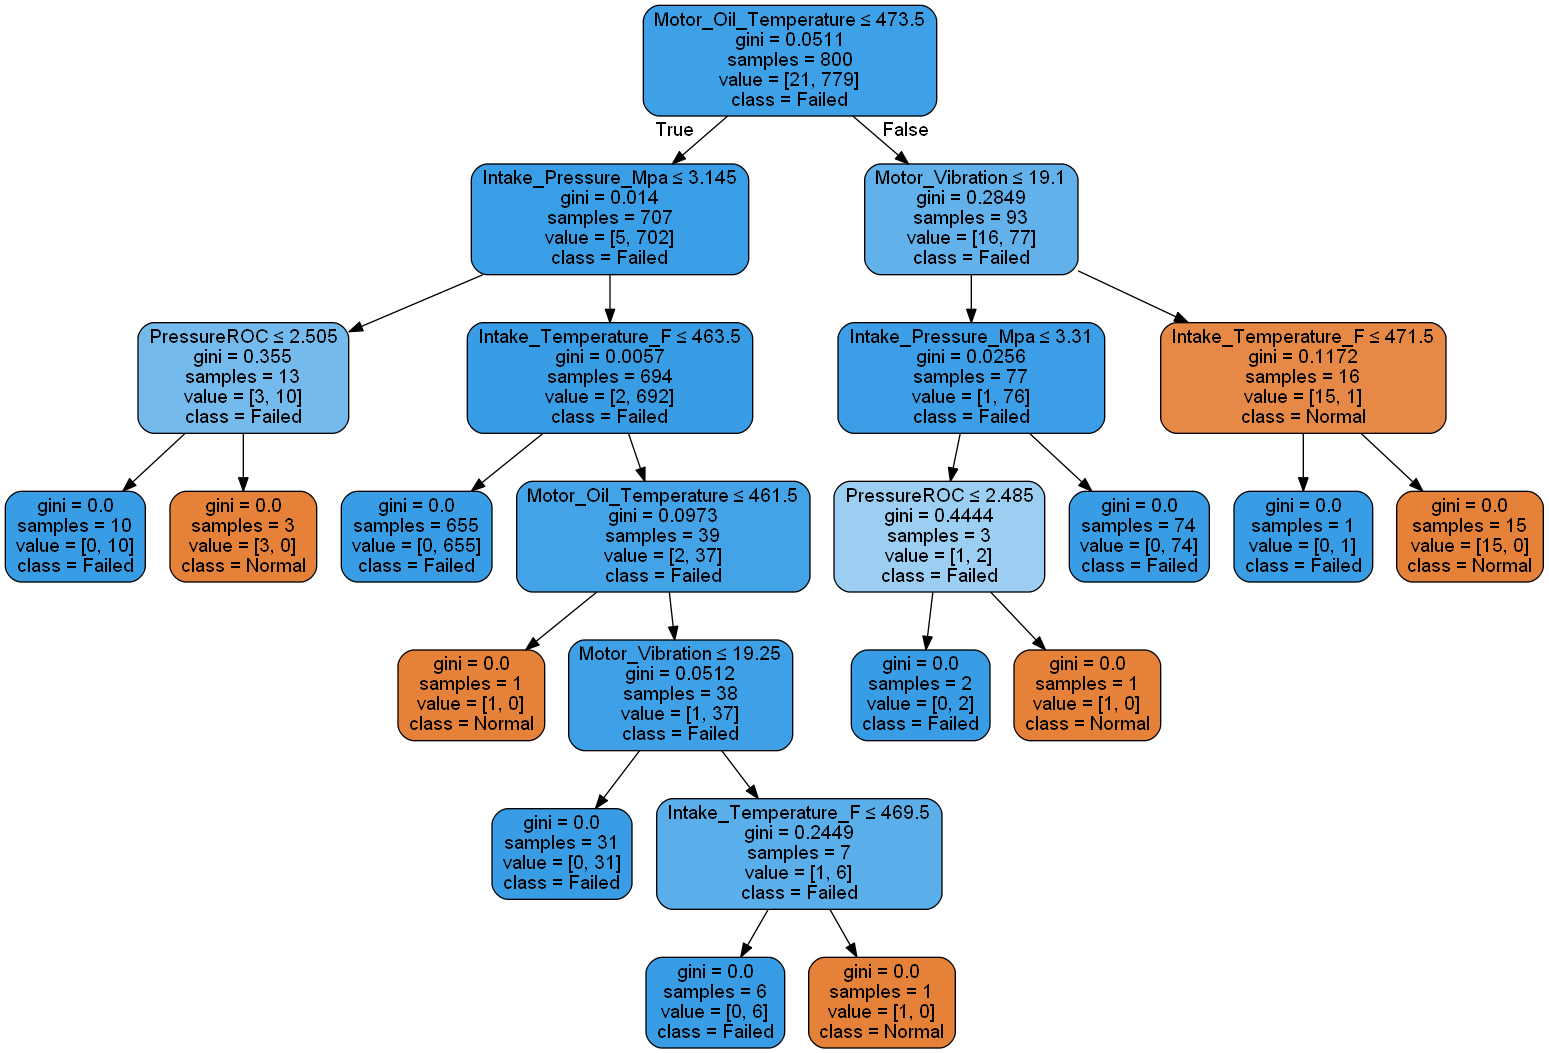

In [41]:
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=["Normal", "Failed"],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())   

# Make Predictions Using the DTree


In [42]:
#Now that we have clf already built, 
#it is simple to make it predict for data
# it has not seen
clf.predict(X_test)

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Failed', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Failed', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Failed', 'Normal', 'Norm

# Are these Predictions Any Good?

How do they compare to the true values 

In [48]:
from sklearn.metrics import confusion_matrix


y_pred = clf.predict(X_test)
y_true = y_test

confusion_matrix( y_pred, y_true, labels=["Normal", "Failed"])


array([[214,   2],
       [  0,   7]])

In [61]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)